In [1]:
import pandas as pd
preprocessed_dataset=pd.read_csv("../Datasets/Clustering/Bank Customer Segmentation/preprocessed_dataset.csv")

In [10]:
preprocessed_dataset.head(5)

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Hour,Minute,TimePeriod,HourMinute,Age,AgeGroup
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,15:46:47,25.0,15,46,Afternoon,0 days 15:46:00.000000000,30,26-35
1,1996-11-26,F,MUMBAI,17874.44,2016-02-08,15:38:32,459.0,15,38,Afternoon,0 days 15:38:00.000000000,28,26-35
2,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,02:19:16,1762.5,2,19,Night,0 days 02:19:00.000000000,37,36-45
3,1992-01-26,F,MUMBAI,973.46,2016-02-08,00:16:46,566.0,0,16,Night,0 days 00:16:00.000000000,33,26-35
4,1982-01-27,M,MUMBAI,95075.54,2016-02-08,23:22:17,148.0,23,22,Night,0 days 23:22:00.000000000,43,36-45


In [2]:
from Univariate import Univariate
quan,qual=Univariate.quan_qual(preprocessed_dataset)

In [3]:
quan

['CustAccountBalance', 'TransactionAmount (INR)', 'Hour', 'Minute', 'Age']

In [4]:
qual

['CustomerDOB',
 'CustGender',
 'CustLocation',
 'TransactionDate',
 'TransactionTime',
 'TimePeriod',
 'HourMinute']

### 1.Is there a correlation between Customer Age and Account Balance?

Correlation between Age and Account Balance: 0.12


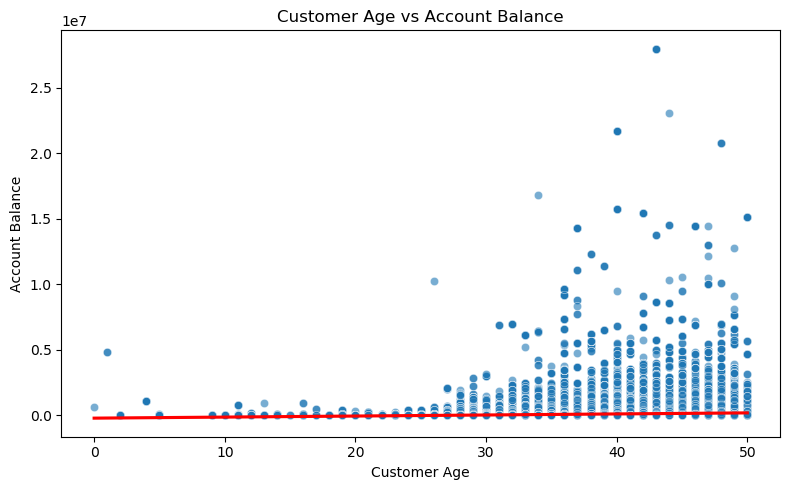

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is already loaded and cleaned:
# 'Age' should be numeric (int), and 'CustAccountBalance' should be numeric too

# 1. Calculate correlation
correlation = preprocessed_dataset['Age'].corr(preprocessed_dataset['CustAccountBalance'])
print(f"Correlation between Age and Account Balance: {correlation:.2f}")

# 2. Plot the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=preprocessed_dataset, x='Age', y='CustAccountBalance', alpha=0.6)
sns.regplot(data=preprocessed_dataset, x='Age', y='CustAccountBalance', scatter=False, color='red')

plt.title('Customer Age vs Account Balance')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.tight_layout()
plt.show()


### 2.What age group has done most transactions?

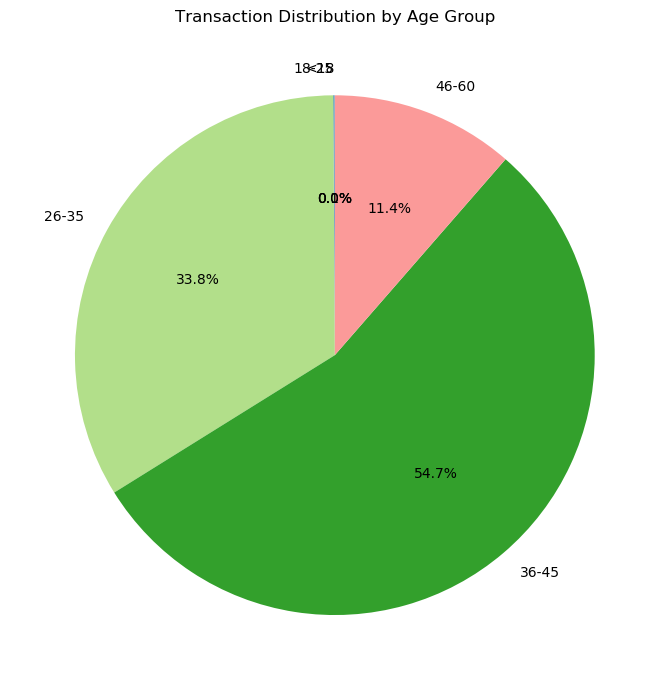

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define age bins and labels
age_bins = [0, 18, 25, 35, 45, 60, 100]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']

# Step 2: Create a new column for age groups
preprocessed_dataset['AgeGroup'] = pd.cut(preprocessed_dataset['Age'], bins=age_bins, labels=age_labels, right=False)

# Step 3: Count number of transactions per age group
age_group_counts = preprocessed_dataset['AgeGroup'].value_counts().sort_index()

# Step 4: Plot a pie chart
plt.figure(figsize=(7, 7))
age_group_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Transaction Distribution by Age Group')
plt.ylabel('')  # Hide y-label for cleaner pie chart
plt.tight_layout()
plt.show()


### 3. Does Transaction Amount differ by CustGender?

               count         mean          std  min    25%    50%     75%  \
CustGender                                                                  
F           176100.0  1450.546821  5881.041798  0.0  190.0  500.0  1271.0   
M           455291.0  1228.277055  5576.474422  0.0  125.0  354.0  1000.0   

                   max  
CustGender              
F           1380002.88  
M           1560034.99  


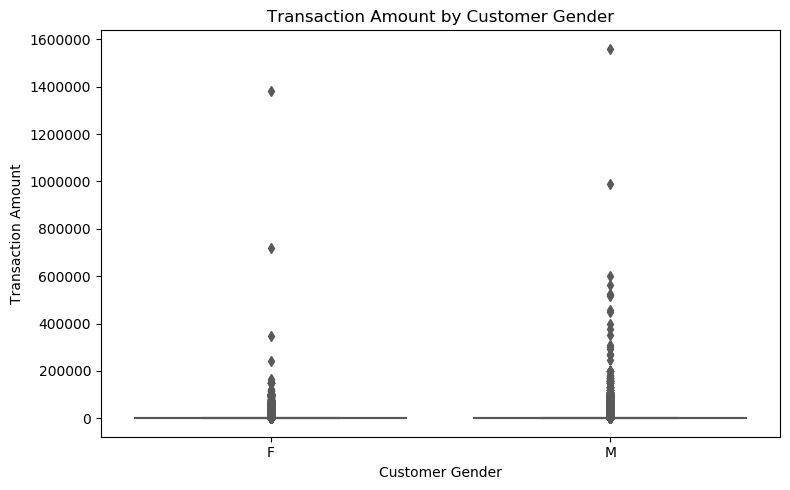

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Summary stats by gender
print(preprocessed_dataset.groupby('CustGender')['TransactionAmount (INR)'].describe())

# 2. Box plot to visualize distribution
plt.figure(figsize=(8, 5))
sns.boxplot(data=preprocessed_dataset, x='CustGender', y='TransactionAmount (INR)', palette='Set2')
plt.title('Transaction Amount by Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()


### 4.Is there a relationship between Customer Age and Transaction Amount?

Correlation between Age and Transaction Amount: 0.07


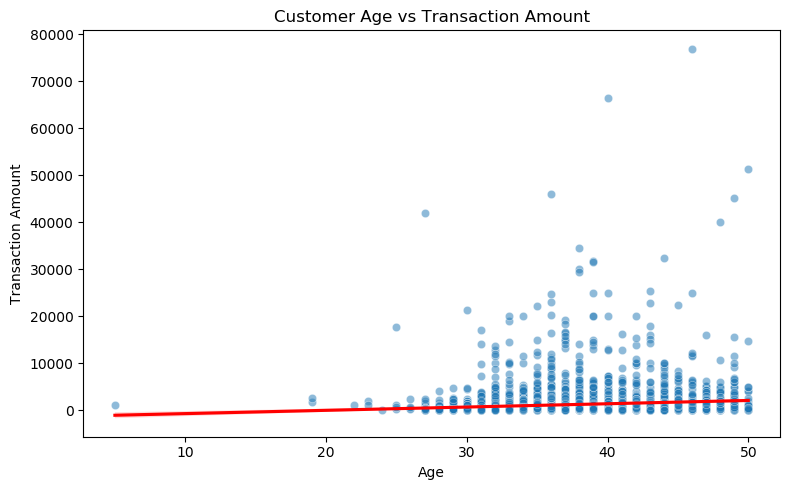

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare data: select relevant columns and drop missing or invalid values
df = preprocessed_dataset[['Age', 'TransactionAmount (INR)']].copy()
df = df.dropna()
df = df[(df['Age'] >= 0) & (df['TransactionAmount (INR)'] >= 0)]
df = df.astype({'Age': 'float', 'TransactionAmount (INR)': 'float'})

# 2. Calculate Pearson correlation
correlation = df['Age'].corr(df['TransactionAmount (INR)'])
print(f"Correlation between Age and Transaction Amount: {correlation:.2f}")

# 3. Reduce size if dataset is too large for faster plotting
sample_df = df.sample(n=5000, random_state=42) if len(df) > 5000 else df

# 4. Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample_df, x='Age', y='TransactionAmount (INR)', alpha=0.5)
sns.regplot(data=sample_df, x='Age', y='TransactionAmount (INR)', scatter=False, color='red')

plt.title('Customer Age vs Transaction Amount')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.tight_layout()
plt.show()


### 5.How does CustAccountBalance vary across different CustLocations?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Drop missing or invalid values
df = preprocessed_dataset[['CustLocation', 'CustAccountBalance']].dropna()
df = df[df['CustAccountBalance'] >= 0]  # remove invalid balances

# 2. Sample the data for quicker plotting (optional, if dataset is too large)
sample_df = df.sample(n=5000, random_state=42) if len(df) > 5000 else df

# 3. Box plot of account balance by location
plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_df, x='CustLocation', y='CustAccountBalance', palette='Set3')
plt.title('Account Balance Distribution by Customer Location')
plt.xlabel('Customer Location')
plt.ylabel('Account Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

### 6.Does the time of day (TransactionTime) affect average Transaction Amount?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Clean and prepare data
df = preprocessed_dataset[['TimePeriod', 'TransactionAmount (INR)']].copy()
df = df.dropna()
df = df[df['TransactionAmount (INR)'] >= 0]  # remove invalid transactions

# 2. Group by TimePeriod and calculate mean transaction amount
avg_amount_by_period = df.groupby('TimePeriod')['TransactionAmount (INR)'].mean().sort_values()

# 3. Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_amount_by_period.index, y=avg_amount_by_period.values, palette='viridis')
plt.title('Average Transaction Amount by Time of Day')
plt.xlabel('Time Period')
plt.ylabel('Average Transaction Amount (INR)')
plt.tight_layout()
plt.show()


### 7.GIve to 5 customer segmentation  with respect to transaction amount?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Clean and prepare data
df = preprocessed_dataset[['TransactionAmount (INR)', 'CustGender', 'CustLocation']].copy()
df = df.dropna()
df = df[df['TransactionAmount (INR)'] >= 0]  # Remove invalid transactions

# 2. Define bins for transaction amount
bins = [0, 500, 2000, 5000, 10000, df['TransactionAmount (INR)'].max()]
labels = ['Low', 'Medium-low', 'Medium', 'Medium-high', 'High']

# 3. Segment customers based on transaction amount
df['TransactionSegment'] = pd.cut(df['TransactionAmount (INR)'], bins=bins, labels=labels)

# 4. Count number of customers in each segment
segment_counts = df['TransactionSegment'].value_counts().sort_index()

# 5. Visualize the segmentation with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')
plt.title('Customer Segmentation Based on Transaction Amount')
plt.xlabel('Transaction Amount Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()
